In [58]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import networkx as nx
import random

In [130]:
def visualize_graph_pair(graph1: nx.Graph, graph2: nx.Graph, is_isomorphic: bool) -> None:
    plt.figure(figsize=(12, 6))
    
    # Plot graph 1
    plt.subplot(121)
    nx.draw(graph1, with_labels=False, font_weight='bold', node_color='skyblue', node_size=6)
    plt.title("Graph 1")

    # Plot graph 2
    plt.subplot(122)
    nx.draw(graph2, with_labels=False, font_weight='bold', node_color='lightgreen', node_size=6)
    plt.title("Graph 2")

    # Show isomorphism status
    plt.suptitle(f"Isomorphic: {is_isomorphic}, Number of nodes: {graph1.number_of_nodes()}")

    plt.show()

In [92]:
def generate_isomorphism_with_permutation(G: nx.Graph) -> nx.Graph:

    # Generate a random permutation σ of the vertex set V
    V = list(G.nodes())
    random.shuffle(V)
    permutation = {original: new for original, new in zip(G.nodes(), V)}
    # Create the graph G' with edges E' based on the permutation σ
    G_prime = nx.relabel_nodes(G, permutation)
    while not nx.is_isomorphic(G, G_prime) and not nx.is_connected(G_prime):
        random.shuffle(V)
        permutation = {original: new for original, new in zip(G.nodes(), V)}
        G_prime = nx.relabel_nodes(G, permutation)

    return G_prime

In [93]:
# Function to generate a non-isomorphic graph pair with the same number of vertices
def generate_non_isomorphic_graph(base_graph: nx.Graph, num_nodes: int, edge_prob = 0.5) -> nx.Graph:
    # Generate a non-isomorphic graph with the same number of nodes
    non_iso_graph = nx.gnp_random_graph(num_nodes, edge_prob)
    while nx.is_isomorphic(base_graph, non_iso_graph) or nx.is_connected(non_iso_graph) == False:
        non_iso_graph = nx.gnp_random_graph(num_nodes, edge_prob)
        
    return non_iso_graph

In [94]:
def generate_connected_graph(num_nodes: int, edge_prob: float) -> nx.Graph:
    G = nx.gnp_random_graph(num_nodes, edge_prob)
    while min(dict(nx.degree(G)).values()) == 0:  # Check for isolated vertices
        G = nx.gnp_random_graph(num_nodes, edge_prob)
    return G

In [95]:


# Function to generate a graph pair
def generate_graph_pair(num_nodes: str, is_isomorphic: bool, edge_prob=0.5) -> tuple[nx.Graph, nx.Graph, bool]:
    if num_nodes < 3:
        raise ValueError("Number of nodes must be at least 3")
    
    G = generate_connected_graph(num_nodes, edge_prob) 

    if is_isomorphic:
        G_prime = generate_isomorphism_with_permutation(G)
    else:
        G_prime = generate_non_isomorphic_graph(G, num_nodes, edge_prob)

    return G, G_prime, is_isomorphic


False


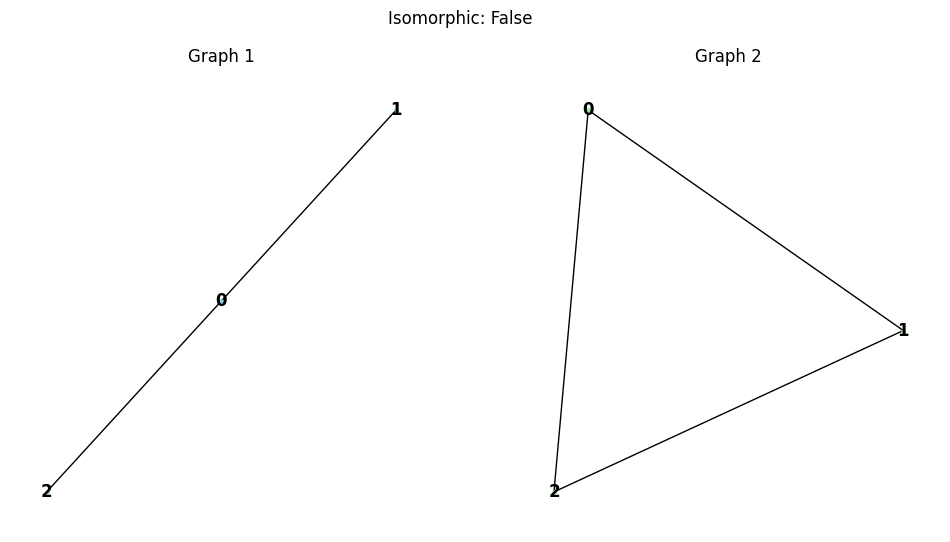

In [64]:
# Generate an example pair of graphs
is_isomorphic = False
example_pair = generate_graph_pair(3, is_isomorphic)  # Change to False to generate non-isomorphic pair
graph1, graph2, is_isomorphic = example_pair
print(nx.is_isomorphic(graph1, graph2))

# Visualize the generated graphs
visualize_graph_pair(graph1, graph2, is_isomorphic)

In [118]:
from math import floor
def create_dataset(max_nodes: int, generation_proportion: int, edge_prob: float) -> list[tuple[nx.Graph, nx.Graph, bool]]:
    dataset = []
    for num_nodes in range(3, max_nodes + 1):
        num_graphs = floor(generation_proportion * num_nodes)
        print(f"Generating {num_graphs} graphs with {num_nodes} nodes")
        for _ in range(num_graphs):
            is_isomorphic = random.choice([True, False])
            graph_pair = generate_graph_pair(num_nodes, is_isomorphic, edge_prob)
            dataset.append(graph_pair)
    return dataset

In [119]:
dataset = create_dataset(10, 1, 0.5)

Generating 3 graphs with 3 nodes
Generating 4 graphs with 4 nodes
Generating 5 graphs with 5 nodes
Generating 6 graphs with 6 nodes
Generating 7 graphs with 7 nodes
Generating 8 graphs with 8 nodes
Generating 9 graphs with 9 nodes
Generating 10 graphs with 10 nodes


In [120]:
len(dataset)

52

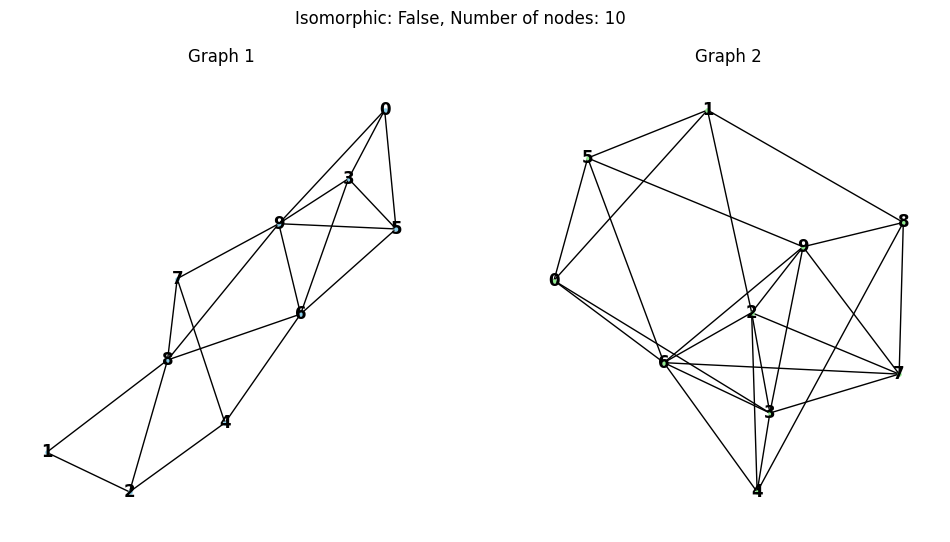

In [129]:
visualize_graph_pair(*dataset[51])

In [131]:
import dgl

def convert_to_dgl(graph):
    # Convert a NetworkX graph to a DGL graph
    return dgl.from_networkx(graph)

# Convert each graph in the pairs to DGL format
dgl_graph_pairs = [(convert_to_dgl(g1), convert_to_dgl(g2)) for g1, g2 in graph_pairs]


NameError: name 'graph_pairs' is not defined